# DIOMIRA data check

In [ ]:
# %load /Users/Gonzalo/github/IC/Config/DIOMIRA_default.csv
#Configuration file for DIOMIRA
PATH_IN,PATH_OUT,FILE_IN,FILE_OUT,PATH_DB,BLR,FIRST_EVT,LAST_EVT,RUN_ALL,END,CLIB,CLEVEL
/Users/Gonzalo/github/IC/data/,/Users/Gonzalo/github/IC/data/,in0.h5,out0.h5,/Users/Gonzalo/github/IC/Database/,True,0,1000,1,1,zlib,1


It is assumed that DIOMIRA has already been run with the above configuration.

In [2]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))


/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This notebook has been run last on 15/10/2016 at 11:57:27.


In [3]:
%ls /Users/Gonzalo/github/IC/data/

in0.h5   out0.h5


In [4]:
# open file and check its contents
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/out0.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/out0.h5 (File) ''
Last modif.: 'Sat Oct 15 10:58:49 2016'
Object Tree: 
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(806,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtrwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(100, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(1420,), shuffle, zlib(1)) 'Store for PMTs TWF'
/TWF/SiPM (Table(10465,), shuffle, zlib(1)) 'Store for SiPMs TWF'



In [5]:
pmttwf  = h5f.root.TWF.PMT
sipmtwf = h5f.root.TWF.SiPM
pmtblr  = h5f.root.RD.pmtblr
pmtrwf  = h5f.root.RD.pmtrwf
sipmrwf = h5f.root.RD.sipmrwf
pmtdf   = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
sipmdf  = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

## Check PMT RWF

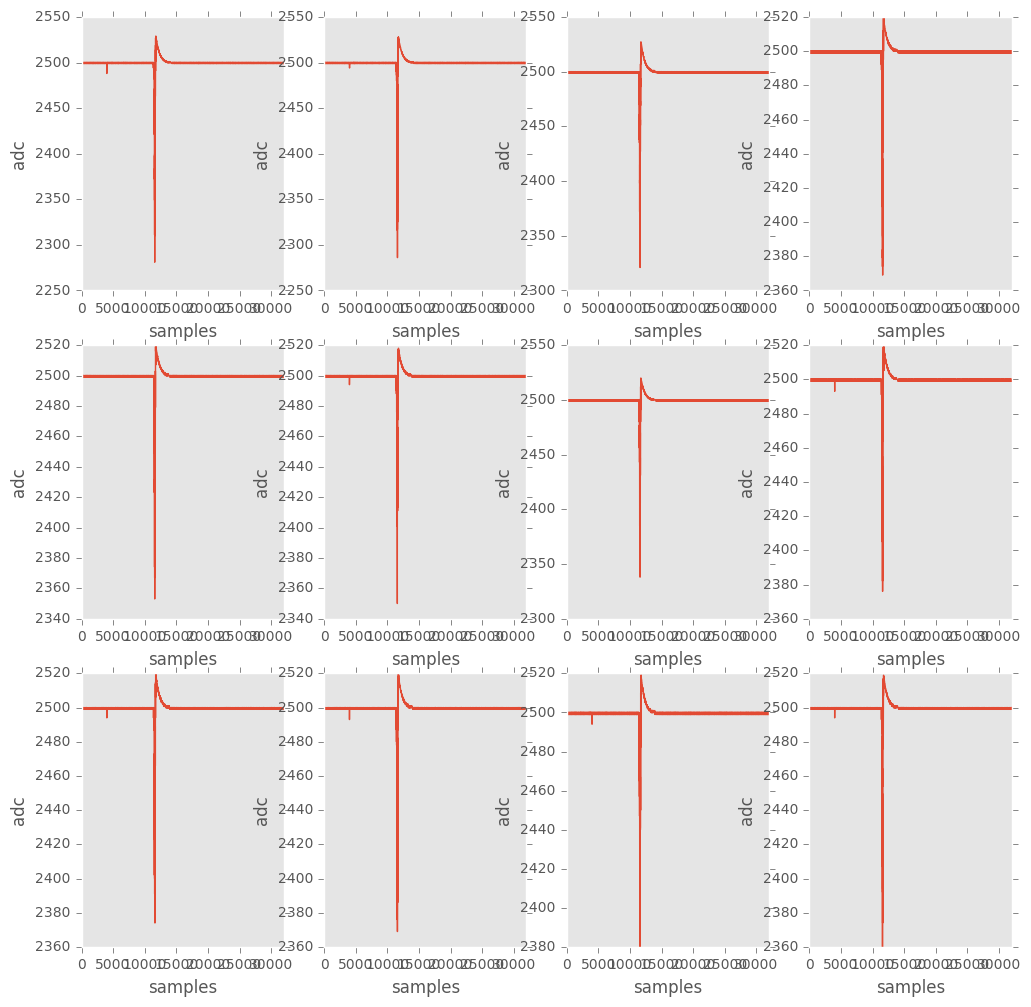

In [9]:
mpl.plot_waveforms(dict(enumerate(pmtrwf[0])))

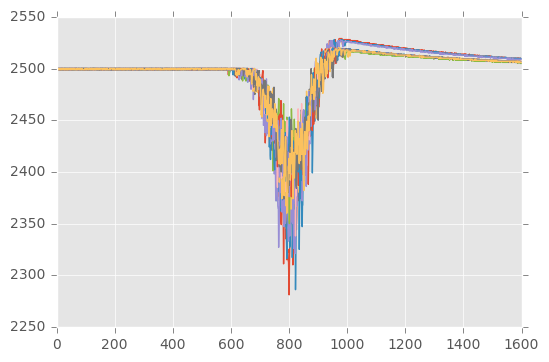

In [31]:
mpl.overlap_waveforms(pmtrwf,0)

## Check BLR

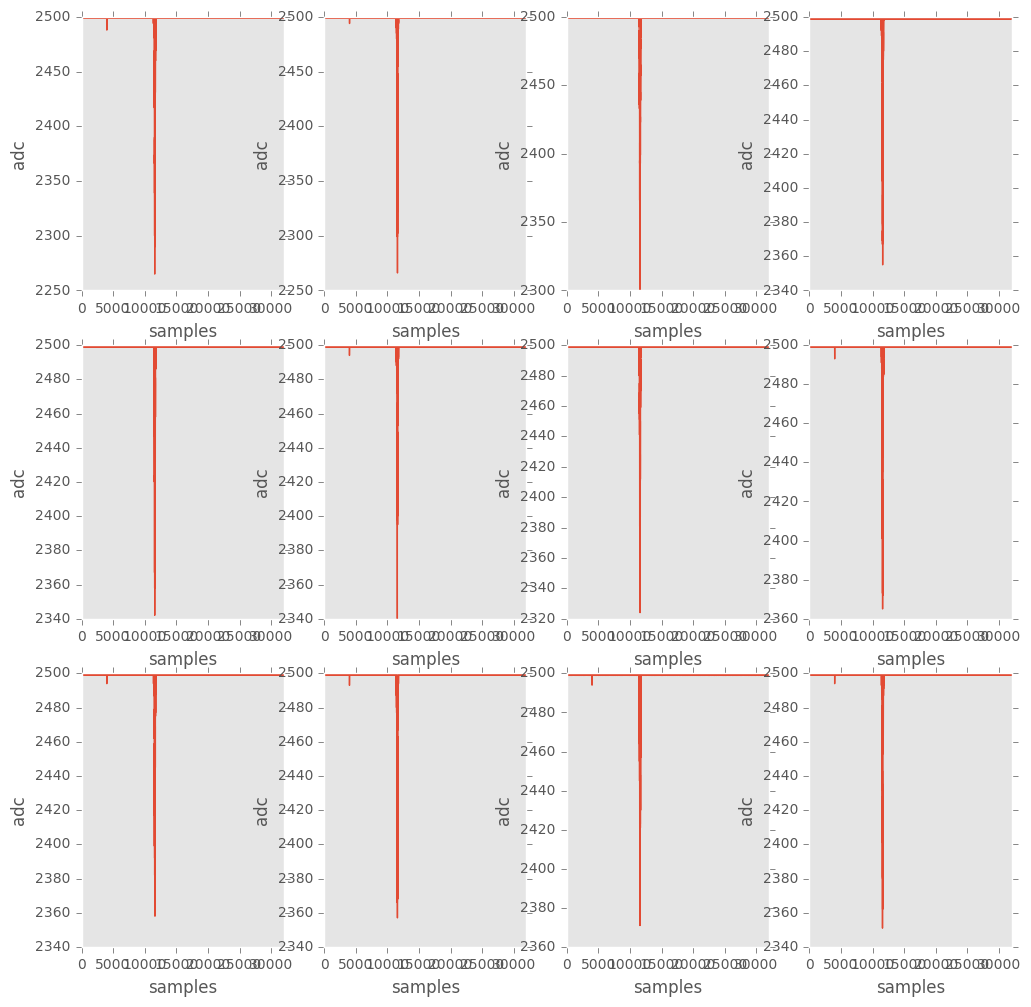

In [14]:
mpl.plot_waveforms(dict(enumerate(pmtblr[0])))

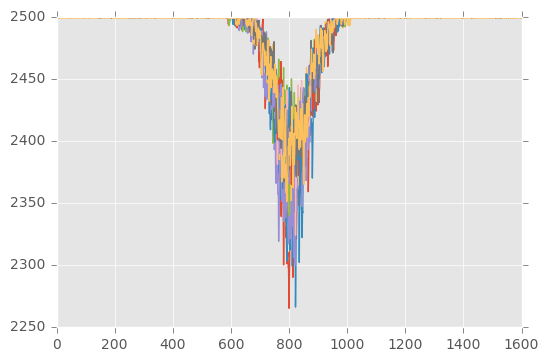

In [33]:
mpl.overlap_waveforms(pmtblr,0)

## Compare RWF with BLR

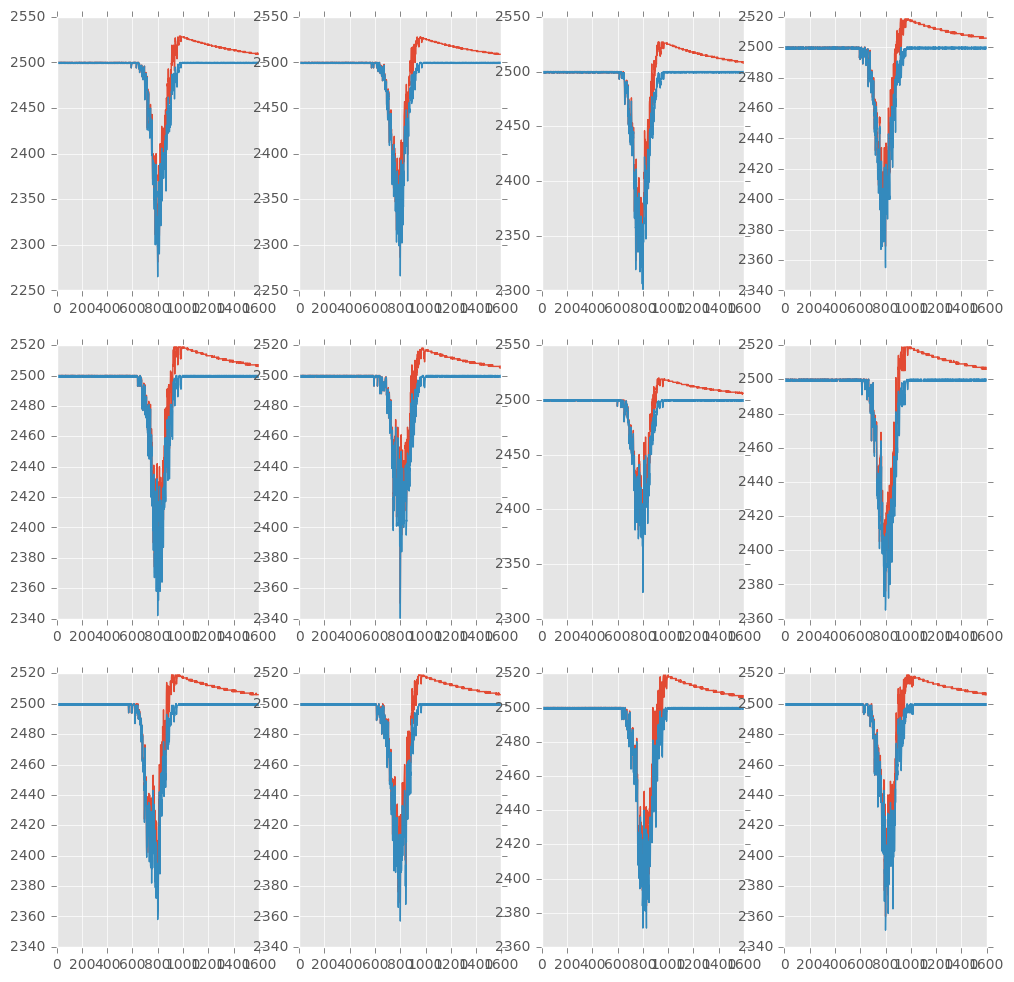

In [34]:
mpl.compare_raw_blr(pmtrwf,pmtblr,0,1)

## Check SiPM RWF

SiPM with greatest peak is at index 331 with ID 6011.0


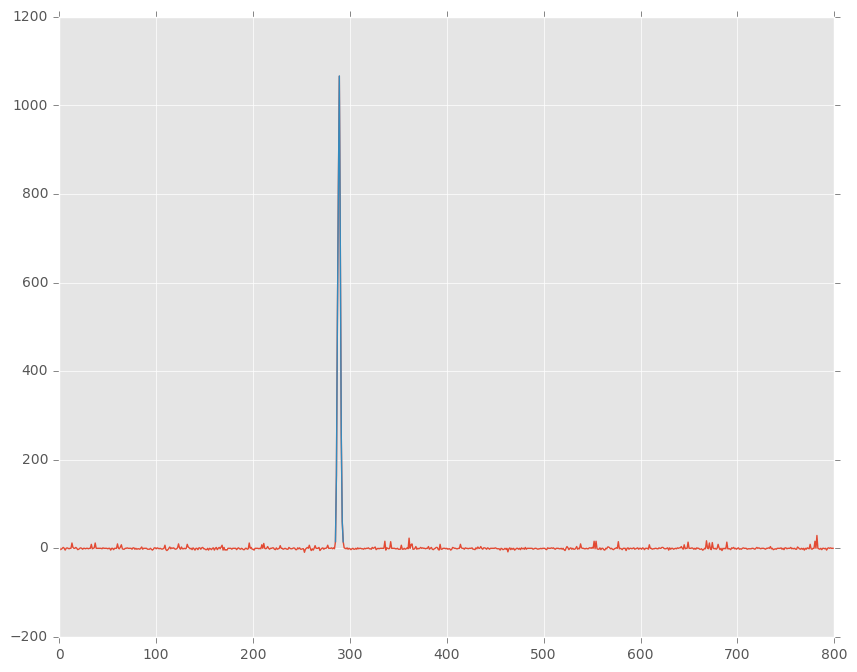

In [70]:
mpl.plot_best(sipmrwf,sipmtwf, sipmdf, evt = 0)

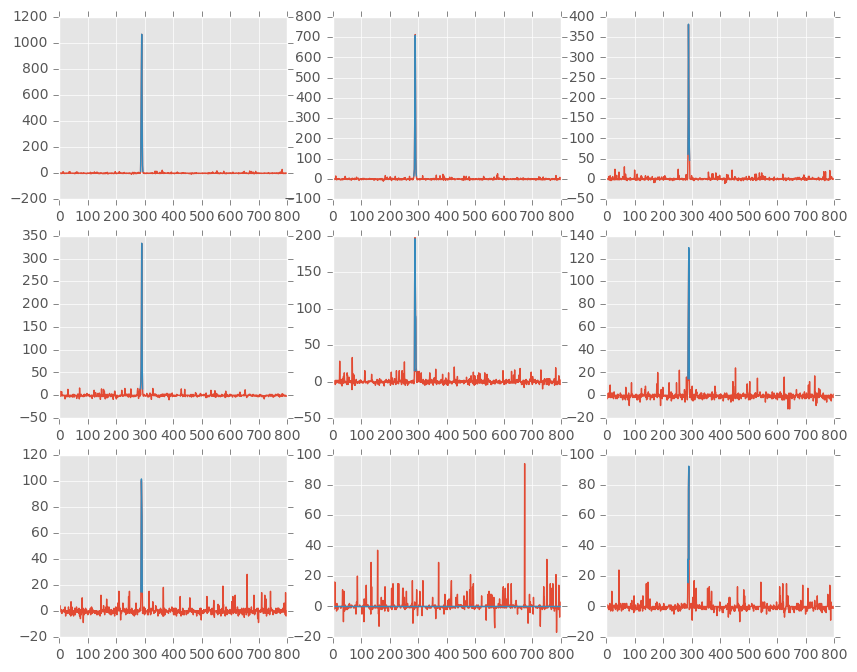

In [81]:
mpl.plot_best_group(sipmrwf,sipmtwf, sipmdf, evt = 0, nsipms = 9, ncols = 3)